category  Appliance  Camera  Gateway  Health  Home Automation  Speaker  TV/ENT
year                                                                          
2019              7      11        6       0                8        5       5
2021              6      12        6       2               15       10       6
2022              7      19        6       8               16       16       8
2023              8      18        9       6               18       17       9
2024              6      25       13       8               28       16       8
{'Appliance': (0.4, 0.7607843137254902, 0.6470588235294118), 'Camera': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 'Gateway': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), 'Health': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), 'Home Automation': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), 'Speaker': (1.0, 0.8509803921568627, 0.1843137254901961), 'TV/ENT': (0.8980392156862745,

/tmp/ipykernel_919538/3888246209.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Set2')


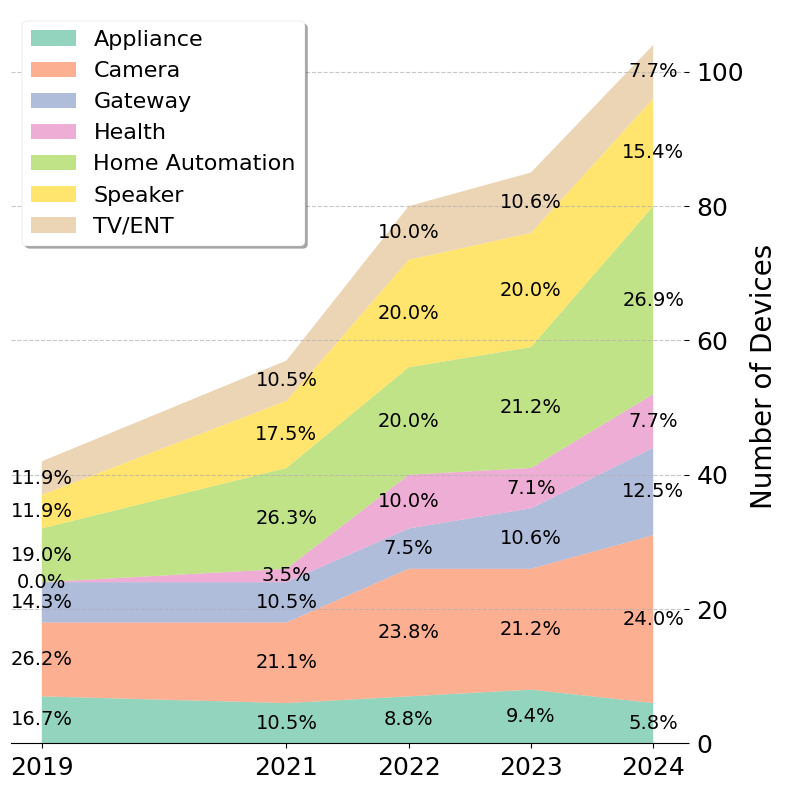

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load the CSV file
file_path = '/home/hutr/iot-longitudinal/input_files/device_category_count_per_year.csv'  # Replace with your file path
# file_path = '/home/hutr/iot-longitudinal/input_files/common_device_category_count_per_year.csv'
data = pd.read_csv(file_path)

# Melt the dataframe for easier plotting (excluding Total)
df_melted = pd.melt(data[data['category'] != 'Total'], 
                    id_vars=['category'], 
                    var_name='year', 
                    value_name='count')
df_melted['year'] = df_melted['year'].astype(int)

# Set style
# plt.style.use("default")
plt.style.use("seaborn-v0_8-paper")


# Plot using Matplotlib directly
fig, ax = plt.subplots(figsize=(8, 8))

# Create the stacked area plot
pivot_data = df_melted.pivot(index='year', columns='category', values='count')
print(pivot_data)

# Get `Set2` colormap
cmap = matplotlib.cm.get_cmap('Set2')
unique_categories = sorted(df_melted['category'].unique())
palette = dict(zip(unique_categories, cmap.colors[:len(unique_categories)]))
print(palette)
# Stacked area plot
ax.stackplot(
    pivot_data.index,  # x-axis (years)
    pivot_data.T,      # Transpose to get categories as rows
    labels=pivot_data.columns,  # Category names
    colors=[palette[cat] for cat in pivot_data.columns],  # Custom palette
    alpha=0.7
)

# Customize the plot
# ax.set_title('Cumulative Device Count by Category (2019-2024)', fontsize=12, pad=15)
ax.set_ylabel('Number of Devices', fontsize=20)
ax.set_xlabel('', fontsize=10)
ax.legend(loc='upper left', frameon=True, shadow=True, facecolor='white', bbox_to_anchor=(0, 1), fontsize=16)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('white')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

# Add percentages for each category and year
for year in pivot_data.index:
    total = pivot_data.loc[year].sum()
    # y_bottom = np.zeros_like(pivot_data.columns, dtype=float)  # Start position of stacked bars
    y_bottom = 0
    for category in pivot_data.columns:
        value = pivot_data.loc[year, category]
        percentage = (value / total) * 100 if total > 0 else 0
        # y_mid = y_bottom[pivot_data.columns.get_loc(category)] + (value * 3)
        y_mid = y_bottom + (value / 2)
        ax.text(year, y_mid, f"{percentage:.1f}%", fontsize=14, ha="center", va="center", color="black")
        # y_bottom[pivot_data.columns.get_loc(category)] += value
        y_bottom += value
    print(y_bottom)

# Set x-axis ticks explicitly
ax.set_xticks([2019, 2021, 2022, 2023, 2024])
ax.set_xticklabels([2019, 2021, 2022, 2023, 2024], fontsize=20)
ax.tick_params(axis='y', which='both', left=False, labelsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.yaxis.tick_right() 
ax.yaxis.set_label_position('right')
plt.tight_layout()
# plt.show()
plt.savefig('/home/hutr/iot-longitudinal/iot-longitudinal/destination-analysis/plotting/figures/device_category_count_per_year.pdf', dpi=300)


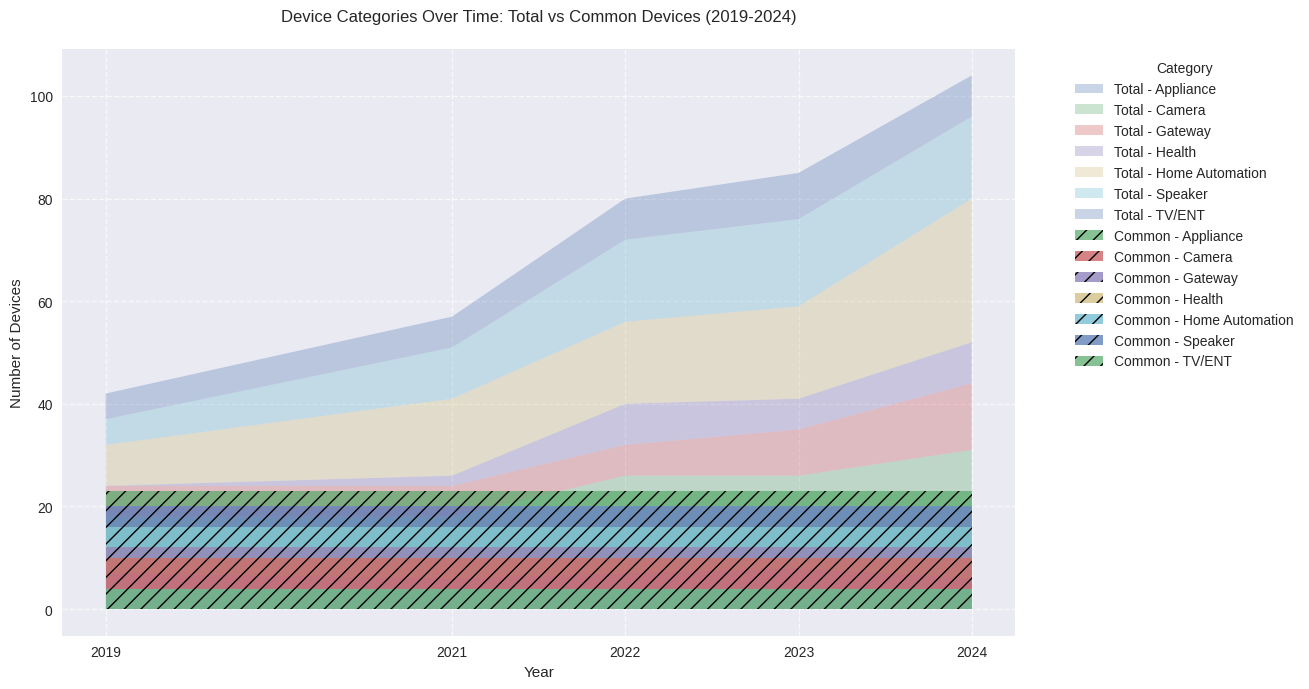

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path_total = '/home/hutr/iot-longitudinal/input_files/device_category_count_per_year.csv'
file_path_common = '/home/hutr/iot-longitudinal/input_files/common_device_category_count_per_year.csv'

total_data = pd.read_csv(file_path_total)
common_data = pd.read_csv(file_path_common)

# Prepare the data (excluding Total)
df_total = pd.melt(total_data[total_data['category'] != 'Total'], 
                   id_vars=['category'], 
                   var_name='year', 
                   value_name='count')
df_total['year'] = df_total['year'].astype(int)

df_common = pd.melt(common_data[common_data['category'] != 'Total'], 
                    id_vars=['category'], 
                    var_name='year', 
                    value_name='count')
df_common['year'] = df_common['year'].astype(int)

# Pivot the data for plotting
pivot_total = df_total.pivot(index='year', columns='category', values='count').fillna(0)
pivot_common = df_common.pivot(index='year', columns='category', values='count').fillna(0)

# Create the plot
plt.figure(figsize=(12, 7))

# Plot total devices as a stacked area
categories = pivot_total.columns
for i, category in enumerate(categories):
    plt.fill_between(
        pivot_total.index,
        pivot_total.iloc[:, :i + 1].sum(axis=1),
        pivot_total.iloc[:, :i].sum(axis=1),
        alpha=0.3,
        label=f'Total - {category}'
    )

# Plot common devices with hatching
for i, category in enumerate(categories):
    plt.fill_between(
        pivot_common.index,
        pivot_common.iloc[:, :i + 1].sum(axis=1),
        pivot_common.iloc[:, :i].sum(axis=1),
        alpha=0.7,
        label=f'Common - {category}',
        hatch='//'
    )

# Customize the plot
plt.title('Device Categories Over Time: Total vs Common Devices (2019-2024)', pad=20)
plt.ylabel('Number of Devices')
plt.xlabel('Year')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Explicitly set x-axis ticks to only show years with data
plt.xticks([2019, 2021, 2022, 2023, 2024])

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()

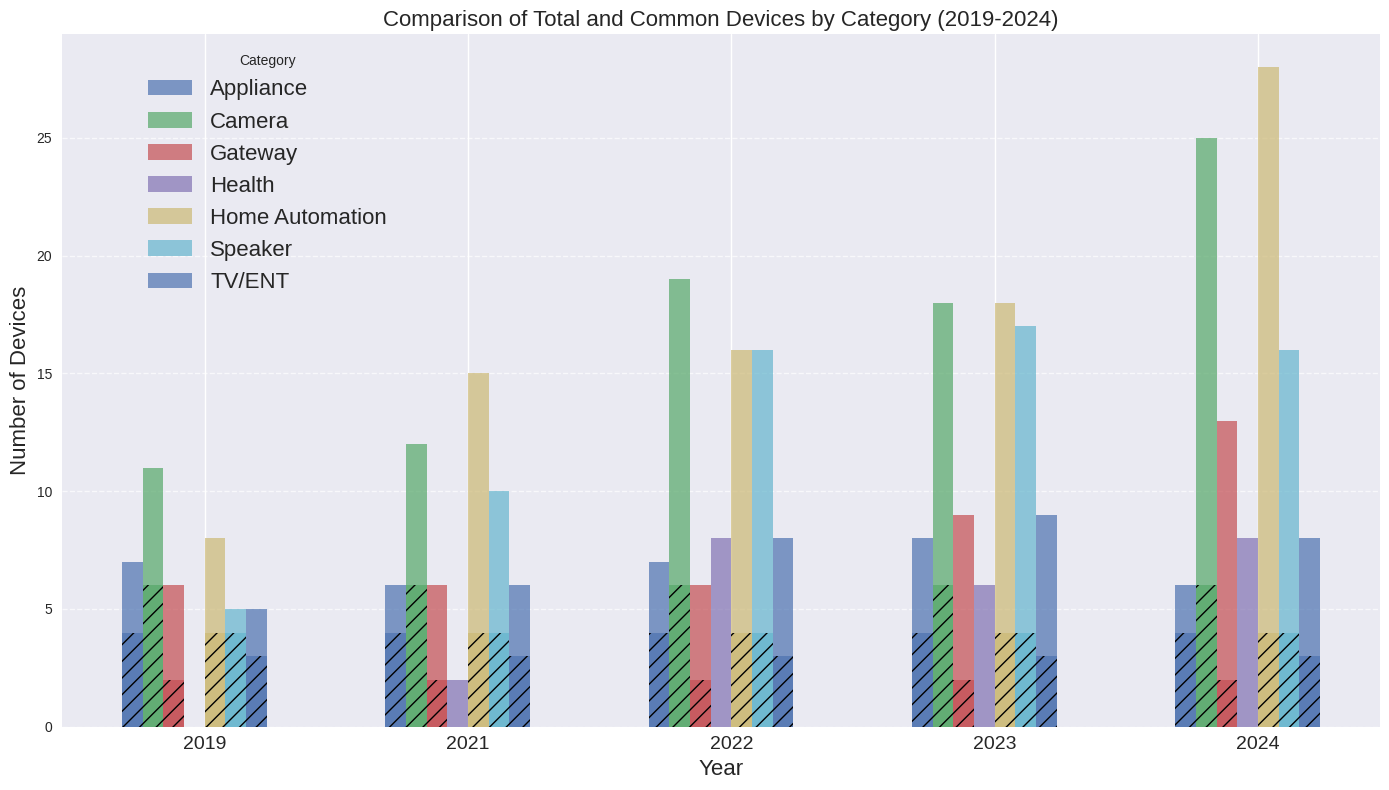

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path_total = '/home/hutr/iot-longitudinal/input_files/device_category_count_per_year.csv'
file_path_common = '/home/hutr/iot-longitudinal/input_files/common_device_category_count_per_year.csv'

total_data = pd.read_csv(file_path_total)
common_data = pd.read_csv(file_path_common)

# Prepare the data (excluding Total)
df_total = pd.melt(total_data[total_data['category'] != 'Total'], 
                   id_vars=['category'], 
                   var_name='year', 
                   value_name='count')
df_total['year'] = df_total['year'].astype(int)

df_common = pd.melt(common_data[common_data['category'] != 'Total'], 
                    id_vars=['category'], 
                    var_name='year', 
                    value_name='count')
df_common['year'] = df_common['year'].astype(int)

# Pivot the data for plotting
pivot_total = df_total.pivot(index='year', columns='category', values='count').fillna(0)
pivot_common = df_common.pivot(index='year', columns='category', values='count').fillna(0)

# Create the bar chart
categories = pivot_total.columns
years = pivot_total.index

bar_width = 0.55  # Width of each bar
x = np.arange(len(years))  # Positions for the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each category
for i, category in enumerate(categories):
    total_bars = ax.bar(
        x - bar_width / 2 + i * (bar_width / len(categories)),
        pivot_total[category],
        bar_width / len(categories),
        label=f'{category}',
        alpha=0.7
    )
    # Plot common bars with the same color as total but without adding to the legend
    ax.bar(
        x - bar_width / 2 + i * (bar_width / len(categories)),
        pivot_common[category],
        bar_width / len(categories),
        hatch='//',
        color=total_bars[0].get_facecolor(),  # Match color with total bars
        alpha=0.7
    )

# Add labels, title, and legend
ax.set_title('Comparison of Total and Common Devices by Category (2019-2024)', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Number of Devices', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=14)
# Customize legend to exclude common devices
handles, labels = ax.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if 'Common' not in l]
ax.legend(*zip(*filtered_handles_labels), bbox_to_anchor=(0.05, 1), loc='upper left', title='Category', fontsize=16)

# Final adjustments and show plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_919538/4165635229.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Set2')


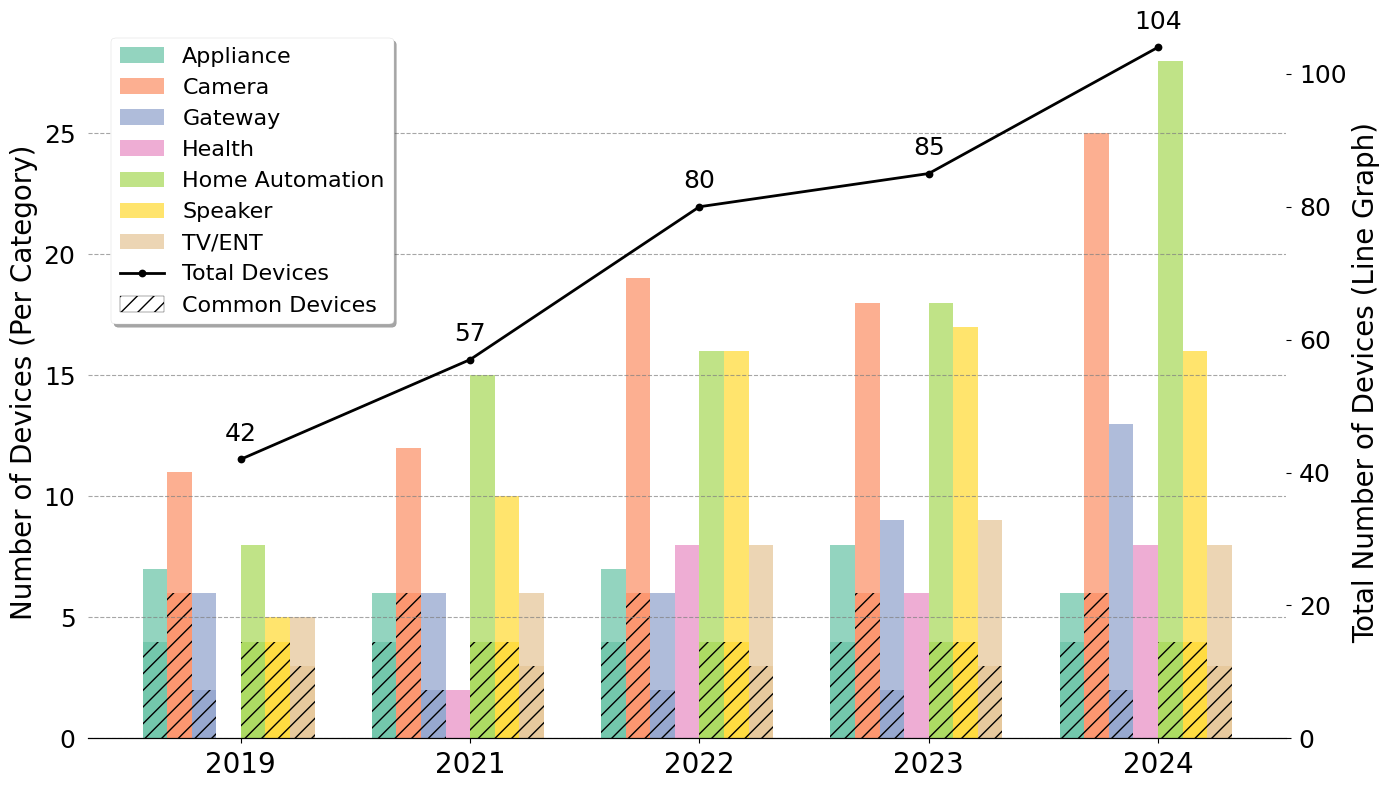

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load the data
file_path_total = '/home/hutr/iot-longitudinal/input_files/device_category_count_per_year.csv'
file_path_common = '/home/hutr/iot-longitudinal/input_files/common_device_category_count_per_year.csv'

total_data = pd.read_csv(file_path_total)
common_data = pd.read_csv(file_path_common)

# Prepare the data (excluding Total)
df_total = pd.melt(total_data[total_data['category'] != 'Total'], 
                   id_vars=['category'], 
                   var_name='year', 
                   value_name='count')
df_total['year'] = df_total['year'].astype(int)

df_common = pd.melt(common_data[common_data['category'] != 'Total'], 
                    id_vars=['category'], 
                    var_name='year', 
                    value_name='count')
df_common['year'] = df_common['year'].astype(int)

# Pivot the data for plotting
pivot_total = df_total.pivot(index='year', columns='category', values='count').fillna(0)
pivot_common = df_common.pivot(index='year', columns='category', values='count').fillna(0)

# Calculate total devices per year
total_devices = pivot_total.sum(axis=1)

# Create the bar chart
categories = pivot_total.columns
years = pivot_total.index

bar_width = 0.75  # Width of each bar
x = np.arange(len(years))  # Positions for the bars

fig, ax1 = plt.subplots(figsize=(14, 8))

# Ensure the background is white
fig.patch.set_facecolor('white')  # Figure background
ax1.set_facecolor('white')  # Axes background

cmap = matplotlib.cm.get_cmap('Set2')
# Plot bars for each category on the primary axis
for i, category in enumerate(categories):
    total_bars = ax1.bar(
        x - bar_width / 2 + i * (bar_width / len(categories)),
        pivot_total[category],
        bar_width / len(categories),
        label=f'{category}',
        alpha=0.7,
        color=cmap.colors[i]
    )
    # Plot common bars with the same color as total but without adding to the legend
    common_bars = ax1.bar(
        x - bar_width / 2 + i * (bar_width / len(categories)),
        pivot_common[category],
        bar_width / len(categories),
        hatch='//',
        color=total_bars[0].get_facecolor(),  # Match color with total bars
        alpha=0.7
    )
    # # Add numbers above the bars
    # for rect in total_bars:
    #     height = rect.get_height()
    #     ax1.text(
    #         rect.get_x() + rect.get_width() / 2, height + 0.5, f'{int(height)}', 
    #         ha='center', va='bottom', fontsize=16
    #     )

# Create a secondary y-axis for the total devices
ax2 = ax1.twinx()
line, = ax2.plot(
    x, total_devices, 
    marker='o', linestyle='-', linewidth=2, color='black', label='Total Devices'
)

# Add numbers above the line points
for i, value in enumerate(total_devices):
    ax2.text(
        x[i], value + 2, f'{int(value)}', 
        ha='center', va='bottom', fontsize=18, color='black'
    )

# Ensure the total devices axis starts at zero
ax2.set_ylim(0, ax2.get_ylim()[1])

# Customize the primary axis (left)
# ax1.set_title('Comparison of Total and Common Devices by Category (2019-2024)', fontsize=24)
# ax1.set_xlabel('Year', fontsize=24)
ax1.set_ylabel('Number of Devices (Per Category)', fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(years, fontsize=20)
ax1.tick_params(axis='y', labelsize=18, left=False)

# Customize the secondary axis (right)
ax2.set_ylabel('Total Number of Devices (Line Graph)', fontsize=20)
ax2.tick_params(axis='y', labelsize=18)

# Customize legend to exclude common devices and merge legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles1, labels1) if 'Common' not in l]
handles = [h for h, l in filtered_handles_labels] + handles2
labels = [l for h, l in filtered_handles_labels] + labels2

# Add a custom legend for the common device pattern
common_patch = mpatches.Patch(facecolor='white', hatch='//', edgecolor='black', label='Common Devices')
handles.append(common_patch)
labels.append('Common Devices')

# Improved legend styling
ax1.legend(handles, labels, loc='upper left', fontsize=16, shadow=True,
           frameon=True, fancybox=True,  bbox_to_anchor=(0.01, 1))

# Remove grid lines from ax2 and apply them only to ax1
ax1.grid(axis='y', linestyle='--', alpha=0.7, color='gray') 
# ax2.grid(axis='y', linestyle='--', alpha=0.7, color='black') 

# Remove spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Final adjustments and show plot
plt.tight_layout()
# plt.show()
plt.savefig('/home/hutr/iot-longitudinal/iot-longitudinal/destination-analysis/plotting/figures/device_category_per_year_bar_chart.pdf', dpi=300)

In [ ]:
# 